# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import re
from fractions import Fraction
from sklearn.preprocessing import LabelEncoder


# Importing CSV

In [2]:
items_df = pd.read_csv("/kaggle/input/itemscsv/item.csv")
sales_df = pd.read_csv("/kaggle/input/salescsv/sales.csv")
promotion_df = pd.read_csv("/kaggle/input/promotionscsv/promotion.csv")
supermarket_df = pd.read_csv("/kaggle/input/supermarketcsv/supermarkets.csv")

# Pre Processing Items dataset

In [3]:
# Replace common empty representations with NaN
items_df.replace(['', ' '], pd.NA, inplace=True)

# Inspect the datasets
# Summary Information Table
total_count = items_df.shape[0]
info_data = {
    "Column": items_df.columns,
    "Non-Null Count": items_df.notnull().sum(),
    "Total Count": total_count,
    "Missing Values": total_count - items_df.notnull().sum(),
    "Data Type": items_df.dtypes
}
info_table = pd.DataFrame(info_data)

# Missing Values Table
missing_values_table = items_df.isnull().sum().reset_index()
missing_values_table.columns = ["Column", "Missing Values"]

# Printing with tabulate
print("Items.csv Info:")
print(tabulate(info_table, headers="keys", tablefmt="fancy_grid"))
print("\nFirst 5 Rows of Items.csv:")
print(tabulate(items_df.head(), headers="keys", tablefmt="fancy_grid"))
print("\nMissing Values in Items.csv:")
print(tabulate(missing_values_table, headers="keys", tablefmt="fancy_grid"))


Items.csv Info:
╒════════════╤════════════╤══════════════════╤═══════════════╤══════════════════╤═════════════╕
│            │ Column     │   Non-Null Count │   Total Count │   Missing Values │ Data Type   │
╞════════════╪════════════╪══════════════════╪═══════════════╪══════════════════╪═════════════╡
│ code       │ code       │              927 │           927 │                0 │ int64       │
├────────────┼────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ descrption │ descrption │              927 │           927 │                0 │ object      │
├────────────┼────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ type       │ type       │              927 │           927 │                0 │ object      │
├────────────┼────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ brand      │ brand      │              927 │           927 │                0 │ object      │
├────────────┼──────────

In [4]:
# Check for duplicates
duplicates = items_df[items_df.duplicated()]

# Display the duplicates
print("Duplicate Rows:")
print(duplicates)

# Count of duplicates
duplicate_count = duplicates.shape[0]
print(f"Count of Duplicate Rows: {duplicate_count}")

Duplicate Rows:
Empty DataFrame
Columns: [code, descrption, type, brand, size]
Index: []
Count of Duplicate Rows: 0


In [5]:
# Dropping a column
items_df = items_df.drop('descrption', axis=1)
items_df.head()

,code,type,brand,size
0,3000005040,Type 1,Aunt Jemima,2 LB
1,3000005070,Type 1,Aunt Jemima,32 OZ
2,3000005300,Type 1,Aunt Jemima,32 OZ
3,3000005350,Type 1,Aunt Jemima,1 LB
4,1600015760,Type 1,Bisquick,6.75 OZ


In [6]:
# Drop rows with any null values from the original DataFrame
items_df.dropna(inplace=True)

# Display the updated DataFrame information
total_count = items_df.shape[0]
info_data = {
    "Column": items_df.columns,
    "Non-Null Count": items_df.notnull().sum(),
    "Total Count": total_count,
    "Missing Values": total_count - items_df.notnull().sum(),
    "Data Type": items_df.dtypes
}
info_table = pd.DataFrame(info_data)

# Missing Values Table (this will now show zero missing values)
missing_values_table = items_df.isnull().sum().reset_index()
missing_values_table.columns = ["Column", "Missing Values"]

# Printing with tabulate
print("Updated Items.csv Info:")
print(tabulate(info_table, headers="keys", tablefmt="fancy_grid"))
print("\nFirst 5 Rows of Updated Items.csv:")
print(tabulate(items_df.head(), headers="keys", tablefmt="fancy_grid"))
print("\nMissing Values in Updated Items.csv:")
print(tabulate(missing_values_table, headers="keys", tablefmt="fancy_grid"))


Updated Items.csv Info:
╒═══════╤══════════╤══════════════════╤═══════════════╤══════════════════╤═════════════╕
│       │ Column   │   Non-Null Count │   Total Count │   Missing Values │ Data Type   │
╞═══════╪══════════╪══════════════════╪═══════════════╪══════════════════╪═════════════╡
│ code  │ code     │              924 │           924 │                0 │ int64       │
├───────┼──────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ type  │ type     │              924 │           924 │                0 │ object      │
├───────┼──────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ brand │ brand    │              924 │           924 │                0 │ object      │
├───────┼──────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ size  │ size     │              924 │           924 │                0 │ object      │
╘═══════╧══════════╧══════════════════╧═══════════════╧══════════════════╧════════════

In [7]:
def convert_fraction_to_decimal(size):
    # Regex to match fractional values (e.g., '6 1/2', '7 1/5')
    fraction_match = re.match(r'(\d+)\s+(\d+)/(\d+)\s*(LB|OZ)', size)
    
    if fraction_match:
        whole_number = int(fraction_match.group(1))
        numerator = int(fraction_match.group(2))
        denominator = int(fraction_match.group(3))
        # Convert to decimal
        decimal_value = whole_number + (numerator / denominator)
        # Return the converted value as a string with appropriate units
        return f"{decimal_value:.1f} {fraction_match.group(4)}"
    
    # Handle single fractions without a whole number (e.g., '1/2')
    single_fraction_match = re.match(r'(\d+)/(\d+)\s*(LB|OZ)', size)
    if single_fraction_match:
        numerator = int(single_fraction_match.group(1))
        denominator = int(single_fraction_match.group(2))
        decimal_value = numerator / denominator
        return f"{decimal_value:.1f} {single_fraction_match.group(3)}"
    
    # If no conversion needed, return the original size
    return size

# Apply the conversion function to the 'size' column
items_df['size'] = items_df['size'].apply(convert_fraction_to_decimal)

# Display the updated DataFrame
items_df

,code,type,brand,size
0,3000005040,Type 1,Aunt Jemima,2 LB
1,3000005070,Type 1,Aunt Jemima,32 OZ
2,3000005300,Type 1,Aunt Jemima,32 OZ
3,3000005350,Type 1,Aunt Jemima,1 LB
4,1600015760,Type 1,Bisquick,6.75 OZ
...,...,...,...,...
922,3905955112,Type 4,Spring Tree,P 24 OZ
923,3905972884,Type 4,Spring Tree,8.5 OZ
924,3068434050,Type 4,Tree of Life,##########
925,3068434052,Type 4,Tree of Life,##########


In [8]:
# Filter out rows where 'size' does not contain 'OZ', 'Ounce', or 'LB'
filtered_df = items_df[~items_df['size'].str.contains('OZ|OUNCE|LB', na=False)]

# Display the filtered DataFrame
filtered_df

,code,type,brand,size
29,4163100055,Type 1,Lund Swede,12.00Z
63,7075304162,Type 2,Antoine's,KH# 2793
91,7680851708,Type 2,Barilla,CUST REQST
137,1510000031,Type 2,Creamette,16 Z
161,7067000721,Type 2,DaVinci,KH# 6862
194,2409407009,Type 2,Dececco,KH# 8652
195,2409407011,Type 2,Dececco,KH# 8651
196,2409407012,Type 2,Dececco,KH# 8623
198,2409407034,Type 2,Dececco,KH# 13384
199,2409407040,Type 2,Dececco,KH# 8525


In [9]:
# Remove rows where 'size' does not contain 'OZ', 'Ounce', or 'LB'
items_df = items_df[items_df['size'].str.contains('OZ|OUNCE|LB', na=False)]

# Display the cleaned DataFrame
items_df

,code,type,brand,size
0,3000005040,Type 1,Aunt Jemima,2 LB
1,3000005070,Type 1,Aunt Jemima,32 OZ
2,3000005300,Type 1,Aunt Jemima,32 OZ
3,3000005350,Type 1,Aunt Jemima,1 LB
4,1600015760,Type 1,Bisquick,6.75 OZ
...,...,...,...,...
920,3905909222,Type 4,Spring Tree,8.5 OZ
921,3905931733,Type 4,Spring Tree,12 OZ
922,3905955112,Type 4,Spring Tree,P 24 OZ
923,3905972884,Type 4,Spring Tree,8.5 OZ


In [10]:
# Clean the 'size' column: keep numeric values and 'OZ', 'OUNCE', or 'LB'
items_df.loc[:, 'size'] = items_df['size'].str.replace(r'^[^0-9]*', '', regex=True)  # Remove characters before numeric
items_df.loc[:, 'size'] = items_df['size'].str.replace(r'(?<=\d)\s*(OZ|OUNCE|LB).*', r' \1', regex=True)  # Keep units
items_df.loc[:, 'size'] = items_df['size'].str.strip()  # Strip any leading or trailing whitespace

# Display the cleaned DataFrame
print(items_df[['code', 'size']])

           code     size
0    3000005040     2 LB
1    3000005070    32 OZ
2    3000005300    32 OZ
3    3000005350     1 LB
4    1600015760  6.75 OZ
..          ...      ...
920  3905909222   8.5 OZ
921  3905931733    12 OZ
922  3905955112    24 OZ
923  3905972884   8.5 OZ
926  6138914020   8.5 OZ

[890 rows x 2 columns]


In [11]:
# Print unique values from the 'size' column
unique_sizes = items_df['size'].unique()
print(unique_sizes)

['2 LB' '32 OZ' '1 LB' '6.75 OZ' '7 OZ' '7.75 OZ' '1.5 LB' '16 OZ' '5 OZ'
 '10.5 OZ' '37 OZ' '28 OZ' '5.5 OZ' '24 OUNCE' '24 OZ' '2.5 OZ' '6.5 OZ'
 '12 OZ' '8.5 OZ' '8 OZ' '16 OUNCE' '9 OZ' '12 OUNCE' '15 OZ' '14 OZ'
 '13 OZ' '12.7 OZ' '17.6 OZ' '10 OZ' '17.5 OZ' '17 OZ' '13.25 OZ'
 '16.00 OZ' '7.25 OZ' '8 OUNCE' '3 LB' '17.7 OZ' '6 OZ' '48 OZ' '8.8 OZ'
 '4 LB' '3.5 OZ' '2.8 OZ' '31.5 OZ' '26 OZ' '26 OUNCE' '23 OZ' '6.3 OZ'
 '26.5 OZ' '25 OZ' '15.5 OZ' '25.5 OZ' '50 OZ' '1.1 OZ' '27.75 OZ' '67 OZ'
 '25.75 OZ' '25.6 OZ' '27.50 OZ' '27.5 OZ' '26.50 OZ' '26.3 OZ' '6 LB'
 '45 OZ' '25.3 OZ' '12.5 FL OZ' '36 OZ' '12 FL OZ' '12.5 OZ' '27.6 OZ'
 '24 FL OZ' '10.6 OZ' '16.9 OZ' '19 OZ' '36 FL OZ' '40 OZ' '20 OZ'
 '14.5 OZ']


In [12]:
# Conversion factors
conversion_factors = {
    'POUNDS': 453.592,  # 1 pound = 453.592 grams
    'OUNCE': 28.3495,   # 1 ounce = 28.3495 grams
    'LB': 453.592,      # 1 LB = 453.592 grams
    'OZ': 28.3495,      # 1 OZ = 28.3495 grams
    'FL OZ': 29.5735    # 1 fluid ounce = 29.5735 milliliters
}

def convert_to_metric(size):
    # Strip leading and trailing whitespace and convert to uppercase
    size = size.strip().upper()
    
    # Check for "FL OZ" directly
    if "FL OZ" in size:
        parts = size.split("FL OZ")
        amount = parts[0].strip()  # This will be the amount before "FL OZ"
        unit = "FL OZ"
    else:
        parts = size.split()
        if len(parts) < 2:
            print(f"Warning: '{size}' has insufficient parts for conversion.")
            return None
        # Join any remaining parts in case there are more than 2
        amount = ' '.join(parts[:-1])
        unit = parts[-1]

    try:
        amount = float(amount)
    except ValueError:
        print(f"Warning: '{amount}' is not a valid float in size '{size}'.")
        return None

    if unit in conversion_factors:
        return amount * conversion_factors[unit]
    else:
        print(f"Warning: Unrecognized unit '{unit}' in size '{size}'.")
        return None

# Using .loc to assign the new column
items_df.loc[:, 'size_in_grams'] = items_df['size'].apply(convert_to_metric)

# Display the updated DataFrame
print(items_df)


           code    type         brand     size  size_in_grams
0    3000005040  Type 1   Aunt Jemima     2 LB     907.184000
1    3000005070  Type 1   Aunt Jemima    32 OZ     907.184000
2    3000005300  Type 1   Aunt Jemima    32 OZ     907.184000
3    3000005350  Type 1   Aunt Jemima     1 LB     453.592000
4    1600015760  Type 1      Bisquick  6.75 OZ     191.359125
..          ...     ...           ...      ...            ...
920  3905909222  Type 4   Spring Tree   8.5 OZ     240.970750
921  3905931733  Type 4   Spring Tree    12 OZ     340.194000
922  3905955112  Type 4   Spring Tree    24 OZ     680.388000
923  3905972884  Type 4   Spring Tree   8.5 OZ     240.970750
926  6138914020  Type 4  Vermont Gold   8.5 OZ     240.970750

[890 rows x 5 columns]


<ipython-input-12-36b47aadecca>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df.loc[:, 'size_in_grams'] = items_df['size'].apply(convert_to_metric)


In [13]:
# Count NaN values in 'size_in_grams'
nan_count = items_df['size_in_grams'].isna().sum()

# Count empty strings in 'size_in_grams'
empty_count = items_df['size_in_grams'].eq('').sum()

# Display the counts
print(f"Number of NaN values in 'size_in_grams': {nan_count}")
print(f"Number of empty values in 'size_in_grams': {empty_count}")

# Optionally, display the rows with NaN or empty values
print("\nRows with NaN in 'size_in_grams':")
print(items_df[items_df['size_in_grams'].isna()])

print("\nRows with empty values in 'size_in_grams':")
print(items_df[items_df['size_in_grams'].eq('')])


Number of NaN values in 'size_in_grams': 0
Number of empty values in 'size_in_grams': 0

Rows with NaN in 'size_in_grams':
Empty DataFrame
Columns: [code, type, brand, size, size_in_grams]
Index: []

Rows with empty values in 'size_in_grams':
Empty DataFrame
Columns: [code, type, brand, size, size_in_grams]
Index: []


In [14]:
# Convert specified columns to categorical directly
items_df['type'] = items_df['type'].astype('category')
items_df['brand'] = items_df['brand'].astype('category')

# Check the data types to confirm changes
print(items_df.dtypes)


code                int64
type             category
brand            category
size               object
size_in_grams     float64
dtype: object


<ipython-input-14-1b2211102c85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['type'] = items_df['type'].astype('category')
<ipython-input-14-1b2211102c85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['brand'] = items_df['brand'].astype('category')


In [15]:
# Use .loc[] to perform operations explicitly on the DataFrame
items_df.loc[:, 'type'] = items_df['type'].str.lower().str.strip()
items_df.loc[:, 'brand'] = items_df['brand'].str.lower().str.strip()

# Display the first 5 rows to verify the changes
print(items_df.head())

         code    type        brand     size  size_in_grams
0  3000005040  type 1  aunt jemima     2 LB     907.184000
1  3000005070  type 1  aunt jemima    32 OZ     907.184000
2  3000005300  type 1  aunt jemima    32 OZ     907.184000
3  3000005350  type 1  aunt jemima     1 LB     453.592000
4  1600015760  type 1     bisquick  6.75 OZ     191.359125


Item Types and Counts:
╒════╤════════╤═════════╕
│    │ Type   │   Count │
╞════╪════════╪═════════╡
│  0 │ type 2 │     429 │
├────┼────────┼─────────┤
│  1 │ type 3 │     285 │
├────┼────────┼─────────┤
│  2 │ type 4 │     134 │
├────┼────────┼─────────┤
│  3 │ type 1 │      42 │
╘════╧════════╧═════════╛


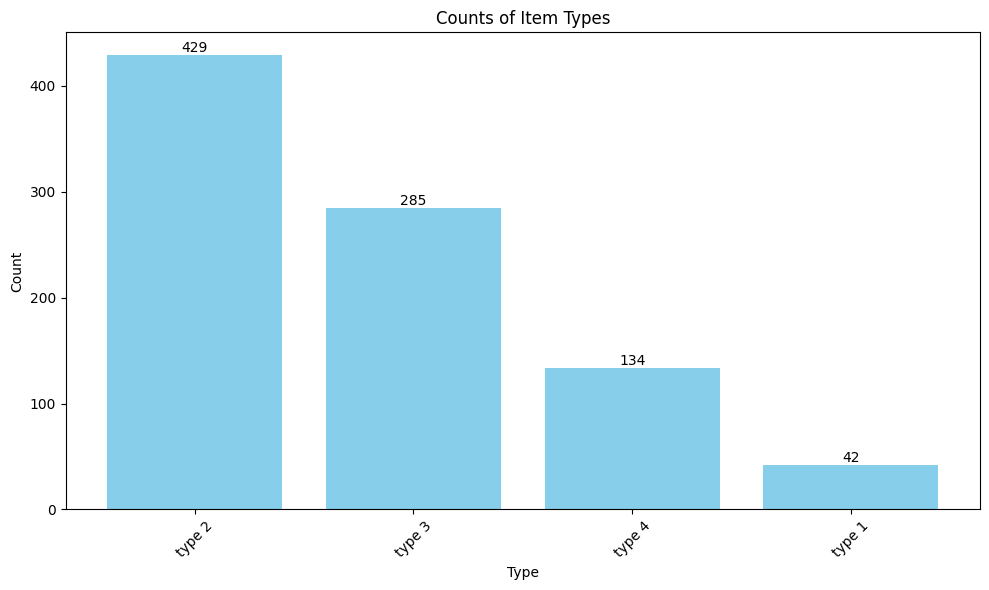

In [16]:
# Count unique values for Type and Brand
type_counts = items_df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Printing with tabulate
print("Item Types and Counts:")
print(tabulate(type_counts, headers="keys", tablefmt="fancy_grid"))

# Bar Chart for Item Types
plt.figure(figsize=(10, 6))
bars = plt.bar(type_counts['Type'], type_counts['Count'], color='skyblue')
plt.title('Counts of Item Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels for better visibility

# Adding counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Add count above bar

plt.tight_layout()
plt.show()


In [17]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'type' column using .loc[]
items_df.loc[:, 'type_encoded'] = label_encoder.fit_transform(items_df['type'])

# Display the DataFrame with the encoded column
print(items_df)


           code    type         brand     size  size_in_grams  type_encoded
0    3000005040  type 1   aunt jemima     2 LB     907.184000             0
1    3000005070  type 1   aunt jemima    32 OZ     907.184000             0
2    3000005300  type 1   aunt jemima    32 OZ     907.184000             0
3    3000005350  type 1   aunt jemima     1 LB     453.592000             0
4    1600015760  type 1      bisquick  6.75 OZ     191.359125             0
..          ...     ...           ...      ...            ...           ...
920  3905909222  type 4   spring tree   8.5 OZ     240.970750             3
921  3905931733  type 4   spring tree    12 OZ     340.194000             3
922  3905955112  type 4   spring tree    24 OZ     680.388000             3
923  3905972884  type 4   spring tree   8.5 OZ     240.970750             3
926  6138914020  type 4  vermont gold   8.5 OZ     240.970750             3

[890 rows x 6 columns]


<ipython-input-17-5d4ed5dc5fed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df.loc[:, 'type_encoded'] = label_encoder.fit_transform(items_df['type'])


In [18]:
import pandas as pd
from tabulate import tabulate

# Assuming items_df is already defined and contains a 'brand' column

# Calculate brand counts and ensure it's a DataFrame
brand_counts = items_df['brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']

# Print the brand counts
print("\nItem Brands and Counts:")
print(tabulate(brand_counts, headers="keys", tablefmt="fancy_grid"))

# Convert brand_counts to a Series for easier access
brand_counts_series = brand_counts.set_index('Brand')['Count']

# Set your threshold
threshold = 10

# Categorize brands in items_df using .loc to avoid SettingWithCopyWarning
items_df.loc[:, 'brand_category'] = items_df['brand'].apply(
    lambda x: x if x in brand_counts_series.index and brand_counts_series[x] >= threshold else 'Other'
)

# Calculate unique values and their counts in the brand_category column
brand_category_counts = items_df['brand_category'].value_counts().reset_index()
brand_category_counts.columns = ['Brand Category', 'Count']

# Print the unique brand categories and their counts
print("\nUnique Brand Categories and Counts:")
print(tabulate(brand_category_counts, headers="keys", tablefmt="fancy_grid"))



Item Brands and Counts:
╒═════╤═══════════════════════╤═════════╕
│     │ Brand                 │   Count │
╞═════╪═══════════════════════╪═════════╡
│   0 │ private label         │      71 │
├─────┼───────────────────────┼─────────┤
│   1 │ barilla               │      49 │
├─────┼───────────────────────┼─────────┤
│   2 │ ragu                  │      47 │
├─────┼───────────────────────┼─────────┤
│   3 │ private label premium │      43 │
├─────┼───────────────────────┼─────────┤
│   4 │ prego                 │      40 │
├─────┼───────────────────────┼─────────┤
│   5 │ ronzoni               │      38 │
├─────┼───────────────────────┼─────────┤
│   6 │ san giorgio           │      35 │
├─────┼───────────────────────┼─────────┤
│   7 │ davinci               │      34 │
├─────┼───────────────────────┼─────────┤
│   8 │ mueller               │      32 │
├─────┼───────────────────────┼─────────┤
│   9 │ creamette             │      29 │
├─────┼───────────────────────┼─────────┤
│  10 │ c

<ipython-input-18-ad9ae1d3f561>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df.loc[:, 'brand_category'] = items_df['brand'].apply(


In [19]:
# Convert 'brand_category' to categorical type
items_df['brand_category'] = items_df['brand_category'].astype('category')

# Check the data types to confirm the change
print(items_df.dtypes)


code                 int64
type                object
brand               object
size                object
size_in_grams      float64
type_encoded         int64
brand_category    category
dtype: object


<ipython-input-19-851b303e0c11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df['brand_category'] = items_df['brand_category'].astype('category')


In [20]:
# Calculate the mean and standard deviation
mean = items_df['size_in_grams'].mean()
std_dev = items_df['size_in_grams'].std()

# Calculate the Z-score using .loc to avoid SettingWithCopyWarning
items_df.loc[:, 'z_score'] = (items_df['size_in_grams'] - mean) / std_dev

# Define a threshold for identifying outliers (commonly 3 or -3)
threshold = 3

# Identify outliers
outliers = items_df[(items_df['z_score'] > threshold) | (items_df['z_score'] < -threshold)]

# Display the outliers
print("Outliers:")
print(outliers[['code', 'size_in_grams', 'z_score']])


Outliers:
           code  size_in_grams   z_score
393  9999908441      1814.3680  4.642462
394  9999908446      1814.3680  4.642462
396  9999981173      1814.3680  4.642462
397  9999981174      1814.3680  4.642462
614  7488810119      1417.4750  3.187912
650  5100001588      1899.4165  4.954151
651  5100001598      1899.4165  4.954151
745  3620000661      2721.5520  7.967147


<ipython-input-20-5fa313d75980>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df.loc[:, 'z_score'] = (items_df['size_in_grams'] - mean) / std_dev


In [21]:
# Optionally, remove outliers
# items_df = items_df[(items_df['z_score'] <= 3) & (items_df['z_score'] >= -3)]

# Drop the z_score column if no longer needed using .loc
items_df = items_df.loc[:, items_df.columns != 'z_score']  # This avoids the warning


# Display the updated DataFrame
print(items_df)

           code    type         brand     size  size_in_grams  type_encoded  \
0    3000005040  type 1   aunt jemima     2 LB     907.184000             0   
1    3000005070  type 1   aunt jemima    32 OZ     907.184000             0   
2    3000005300  type 1   aunt jemima    32 OZ     907.184000             0   
3    3000005350  type 1   aunt jemima     1 LB     453.592000             0   
4    1600015760  type 1      bisquick  6.75 OZ     191.359125             0   
..          ...     ...           ...      ...            ...           ...   
920  3905909222  type 4   spring tree   8.5 OZ     240.970750             3   
921  3905931733  type 4   spring tree    12 OZ     340.194000             3   
922  3905955112  type 4   spring tree    24 OZ     680.388000             3   
923  3905972884  type 4   spring tree   8.5 OZ     240.970750             3   
926  6138914020  type 4  vermont gold   8.5 OZ     240.970750             3   

    brand_category  
0      aunt jemima  
1      au

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
items_df['size_in_grams_scaled'] = scaler.fit_transform(items_df[['size_in_grams']])

In [23]:
items_df.dtypes

code                       int64
type                      object
brand                     object
size                      object
size_in_grams            float64
type_encoded               int64
brand_category          category
size_in_grams_scaled     float64
dtype: object

In [24]:
items_df.head()

,code,type,brand,size,size_in_grams,type_encoded,brand_category,size_in_grams_scaled
0,3000005040,type 1,aunt jemima,2 LB,907.184000,0,aunt jemima,1.318517
1,3000005070,type 1,aunt jemima,32 OZ,907.184000,0,aunt jemima,1.318517
2,3000005300,type 1,aunt jemima,32 OZ,907.184000,0,aunt jemima,1.318517
3,3000005350,type 1,aunt jemima,1 LB,453.592000,0,aunt jemima,-0.344760
4,1600015760,type 1,bisquick,6.75 OZ,191.359125,0,Other,-1.306343


# Pre Processing Sales dataset

In [25]:
# Replace common empty representations with NaN
sales_df.replace(['', ' '], pd.NA, inplace=True)

# Step 1.3: Inspect the datasets
# Summary Information Table
total_count = sales_df.shape[0]
info_data = {
    "Column": sales_df.columns,
    "Non-Null Count": sales_df.notnull().sum(),
    "Total Count": total_count,
    "Missing Values": total_count - sales_df.notnull().sum(),
    "Data Type": sales_df.dtypes
}

# Ensure all columns have the same length
info_table = pd.DataFrame(info_data)

# Missing Values Table
missing_values_table = sales_df.isnull().sum().reset_index()
missing_values_table.columns = ["Column", "Missing Values"]

# Printing with tabulate
print("Sales.csv Info:")
print(tabulate(info_table, headers="keys", tablefmt="fancy_grid"))
print("\nFirst 5 Rows of Sales.csv:")
print(tabulate(sales_df.head(), headers="keys", tablefmt="fancy_grid"))
print("\nMissing Values in Sales.csv:")
print(tabulate(missing_values_table, headers="keys", tablefmt="fancy_grid"))


Sales.csv Info:
╒═════════════╤═════════════╤══════════════════╤═══════════════╤══════════════════╤═════════════╕
│             │ Column      │   Non-Null Count │   Total Count │   Missing Values │ Data Type   │
╞═════════════╪═════════════╪══════════════════╪═══════════════╪══════════════════╪═════════════╡
│ code        │ code        │          1048575 │       1048575 │                0 │ int64       │
├─────────────┼─────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ amount      │ amount      │          1048575 │       1048575 │                0 │ float64     │
├─────────────┼─────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ units       │ units       │          1048575 │       1048575 │                0 │ int64       │
├─────────────┼─────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ time        │ time        │          1048575 │       1048575 │                0 │ int64       │
├───

In [26]:
# Check for duplicates
duplicates = sales_df[sales_df.duplicated()]

# Display the duplicates
print("Duplicate Rows:")
print(duplicates)

# Count of duplicates
duplicate_count = duplicates.shape[0]
print(f"Count of Duplicate Rows: {duplicate_count}")


Duplicate Rows:
Empty DataFrame
Columns: [code, amount, units, time, province, week, customerId, supermarket, basket, day, voucher]
Index: []
Count of Duplicate Rows: 0


In [79]:
import pandas as pd
import numpy as np

# Replace common empty representations with NaN
sales_df.replace(['', ' '], pd.NA, inplace=True)

# Ensure the 'week' column exists
if 'week' in sales_df.columns:
    # Get unique values in the 'week' column, sorted in ascending order
    unique_weeks = sales_df['week'].dropna().unique()
    unique_weeks_sorted = np.sort(unique_weeks)  # Sort the unique values

    # Convert to a NumPy array
    week_array = np.array(unique_weeks_sorted)

    # Print the NumPy array of unique week values
    print("Unique Week Values in Sales as a NumPy Array:")
    print(week_array)
else:
    print("The 'week' column does not exist in the DataFrame.")


Unique Week Values in Sales as a NumPy Array:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 22 23 24 25 26 27
 28]


In [27]:
# 2. Clean Sales.csv
# Ensure 'code' is displayed as integer without scientific notation
sales_df['code'] = sales_df['code'].astype('int64')
sales_df.head()

,code,amount,units,time,province,week,customerId,supermarket,basket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [28]:
# Dropping the 'basket' column from the sales DataFrame
sales_df = sales_df.drop(columns=['basket'])

# Preview the modified DataFrame
sales_df.head()

,code,amount,units,time,province,week,customerId,supermarket,day,voucher
0,7680850106,0.80,1,1100,2,1,125434,244,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,1,0


In [29]:
# Function to convert numerical time to HH:MM
def convert_to_hhmm(value):
    # Ensure the value is a four-digit string
    str_value = str(value).zfill(4)
    hours = str_value[:-2]  # First two characters represent hours
    minutes = str_value[-2:]  # Last two characters represent minutes
    return f"{hours}:{minutes}"

# Apply the conversion function to the 'time_values' column
sales_df['standard_time'] = sales_df['time'].apply(convert_to_hhmm)

# Display the DataFrame
sales_df

,code,amount,units,time,province,week,customerId,supermarket,day,voucher,standard_time
0,7680850106,0.80,1,1100,2,1,125434,244,1,0,11:00
1,3620000470,3.59,1,1100,2,1,125434,244,1,0,11:00
2,1800028064,2.25,1,1137,2,1,108320,244,1,0,11:37
3,9999985067,0.85,1,1148,2,1,162016,244,1,0,11:48
4,9999985131,2.19,1,1323,2,1,89437,244,1,0,13:23
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1510000011,2.35,1,1307,2,27,43825,346,189,0,13:07
1048571,3620000489,0.99,1,1307,2,27,43825,346,189,0,13:07
1048572,9999971309,2.00,2,1410,2,27,42140,346,189,0,14:10
1048573,3620000250,1.98,2,1415,2,27,53544,346,189,0,14:15


In [30]:
# Identify rows where the conversion failed
invalid_time_entries = sales_df[sales_df['time'].isnull()]
invalid_time_entries 

,code,amount,units,time,province,week,customerId,supermarket,day,voucher,standard_time


In [31]:
# Dropping the 'basket' column from the sales DataFrame
sales_df = sales_df.drop(columns=['time'])

# Preview the modified DataFrame
sales_df.head()

,code,amount,units,province,week,customerId,supermarket,day,voucher,standard_time
0,7680850106,0.80,1,2,1,125434,244,1,0,11:00
1,3620000470,3.59,1,2,1,125434,244,1,0,11:00
2,1800028064,2.25,1,2,1,108320,244,1,0,11:37
3,9999985067,0.85,1,2,1,162016,244,1,0,11:48
4,9999985131,2.19,1,2,1,89437,244,1,0,13:23


In [32]:
# Step 1: Convert 'standard_time' to a categorical type
sales_df['standard_time'] = sales_df['standard_time'].astype('category')
# Show the data types of each column in the DataFrame
print(sales_df.dtypes)

code                int64
amount            float64
units               int64
province            int64
week                int64
customerId          int64
supermarket         int64
day                 int64
voucher             int64
standard_time    category
dtype: object


In [33]:
# Step 2: Create a function to categorize the time
def categorize_time(time_str):
    # Extract the hour from the standard_time string
    hour = int(time_str.split(':')[0])
    # Classify based on hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    else:
        return 'evening'

# Step 3: Apply the function to create a new 'time_of_day' column
sales_df['time_of_day'] = sales_df['standard_time'].apply(categorize_time)

# Step 4: Convert the new column to categorical type (optional)
sales_df['time_of_day'] = sales_df['time_of_day'].astype('category')

# Display the updated DataFrame
sales_df[['standard_time', 'time_of_day']]

,standard_time,time_of_day
0,11:00,morning
1,11:00,morning
2,11:37,morning
3,11:48,morning
4,13:23,afternoon
...,...,...
1048570,13:07,afternoon
1048571,13:07,afternoon
1048572,14:10,afternoon
1048573,14:15,afternoon


In [34]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the time_of_day column
sales_df['time_of_day_encoded'] = le.fit_transform(sales_df['time_of_day'])

print(sales_df[['time_of_day', 'time_of_day_encoded']].head())

  time_of_day  time_of_day_encoded
0     morning                    2
1     morning                    2
2     morning                    2
3     morning                    2
4   afternoon                    0


In [35]:
# Convert categorical columns
sales_df['province'] = sales_df['province'].astype('category')
sales_df['supermarket'] = sales_df['supermarket'].astype('category')
sales_df['voucher'] = sales_df['voucher'].astype('category')

In [36]:
# Show the data types of each column in the DataFrame
print(sales_df.dtypes)


code                      int64
amount                  float64
units                     int64
province               category
week                      int64
customerId                int64
supermarket            category
day                       int64
voucher                category
standard_time          category
time_of_day            category
time_of_day_encoded       int64
dtype: object


In [37]:
# Get unique values and their counts for each categorical column
province_counts = sales_df['province'].value_counts()
supermarket_counts = sales_df['supermarket'].value_counts()
voucher_counts = sales_df['voucher'].value_counts()

# Create tables for each category
province_table = province_counts.reset_index()
province_table.columns = ['Province', 'Count']

supermarket_table = supermarket_counts.reset_index()
supermarket_table.columns = ['Supermarket', 'Count']

voucher_table = voucher_counts.reset_index()
voucher_table.columns = ['Voucher', 'Count']

print(province_table) 
print(supermarket_table)
print(voucher_table)


  Province   Count
0        1  585761
1        2  462814
    Supermarket  Count
0           270   6978
1            71   6859
2           359   6805
3           326   6488
4           371   6392
..          ...    ...
371         236    672
372         370    622
373         299    562
374         120    528
375          13    472

[376 rows x 2 columns]
  Voucher    Count
0       0  1023868
1       1    24707


In [38]:
# Create a new column for total sales (amount * units)
sales_df['total_sales'] = sales_df['amount'] * sales_df['units']

In [39]:
sales_df.dtypes

code                      int64
amount                  float64
units                     int64
province               category
week                      int64
customerId                int64
supermarket            category
day                       int64
voucher                category
standard_time          category
time_of_day            category
time_of_day_encoded       int64
total_sales             float64
dtype: object

In [40]:
sales_df.head()

,code,amount,units,province,week,customerId,supermarket,day,voucher,standard_time,time_of_day,time_of_day_encoded,total_sales
0,7680850106,0.80,1,2,1,125434,244,1,0,11:00,morning,2,0.80
1,3620000470,3.59,1,2,1,125434,244,1,0,11:00,morning,2,3.59
2,1800028064,2.25,1,2,1,108320,244,1,0,11:37,morning,2,2.25
3,9999985067,0.85,1,2,1,162016,244,1,0,11:48,morning,2,0.85
4,9999985131,2.19,1,2,1,89437,244,1,0,13:23,afternoon,0,2.19


# Pre processing Promotion dataset

In [41]:
# Replace common empty representations with NaN
promotion_df.replace(['', ' '], pd.NA, inplace=True)

# Step 1.3: Inspect the datasets
# Summary Information Table
total_count = promotion_df.shape[0]
info_data = {
    "Column": promotion_df.columns,
    "Non-Null Count": promotion_df.notnull().sum(),
    "Total Count": total_count,
    "Missing Values": total_count - promotion_df.notnull().sum(),
    "Data Type": promotion_df.dtypes
}

# Ensure all columns have the same length
info_table = pd.DataFrame(info_data)

# Missing Values Table
missing_values_table = promotion_df.isnull().sum().reset_index()
missing_values_table.columns = ["Column", "Missing Values"]

# Printing with tabulate
print("Promotion.csv Info:")
print(tabulate(info_table, headers="keys", tablefmt="fancy_grid"))
print("\nFirst 5 Rows of Promotionscsv:")
print(tabulate(promotion_df.head(), headers="keys", tablefmt="fancy_grid"))
print("\nMissing Values in Promotion.csv:")
print(tabulate(missing_values_table, headers="keys", tablefmt="fancy_grid"))


Promotion.csv Info:
╒══════════════╤══════════════╤══════════════════╤═══════════════╤══════════════════╤═════════════╕
│              │ Column       │   Non-Null Count │   Total Count │   Missing Values │ Data Type   │
╞══════════════╪══════════════╪══════════════════╪═══════════════╪══════════════════╪═════════════╡
│ code         │ code         │           351372 │        351372 │                0 │ int64       │
├──────────────┼──────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ supermarkets │ supermarkets │           351372 │        351372 │                0 │ int64       │
├──────────────┼──────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ week         │ week         │           351372 │        351372 │                0 │ int64       │
├──────────────┼──────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ feature      │ feature      │           351372 │        351372 │              

In [42]:
# 1. Check for duplicates
duplicates = promotion_df.duplicated()
duplicate_count = duplicates.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [43]:
# 3. Clean Promotion.csv
# Convert 'feature' and 'display' to categorical
promotion_df['feature'] = promotion_df['feature'].astype('category')
promotion_df['display'] = promotion_df['display'].astype('category')
promotion_df['province'] = promotion_df['province'].astype('category')
info_data = {
    "Column": promotion_df.columns,
    "Non-Null Count": promotion_df.notnull().sum(),
    "Data Type": promotion_df.dtypes
}
info_table = pd.DataFrame(info_data)
print("Promotions.csv Info:")
print(tabulate(info_table, headers="keys", tablefmt="fancy_grid"))

Promotions.csv Info:
╒══════════════╤══════════════╤══════════════════╤═════════════╕
│              │ Column       │   Non-Null Count │ Data Type   │
╞══════════════╪══════════════╪══════════════════╪═════════════╡
│ code         │ code         │           351372 │ int64       │
├──────────────┼──────────────┼──────────────────┼─────────────┤
│ supermarkets │ supermarkets │           351372 │ int64       │
├──────────────┼──────────────┼──────────────────┼─────────────┤
│ week         │ week         │           351372 │ int64       │
├──────────────┼──────────────┼──────────────────┼─────────────┤
│ feature      │ feature      │           351372 │ category    │
├──────────────┼──────────────┼──────────────────┼─────────────┤
│ display      │ display      │           351372 │ category    │
├──────────────┼──────────────┼──────────────────┼─────────────┤
│ province     │ province     │           351372 │ category    │
╘══════════════╧══════════════╧══════════════════╧═════════════╛


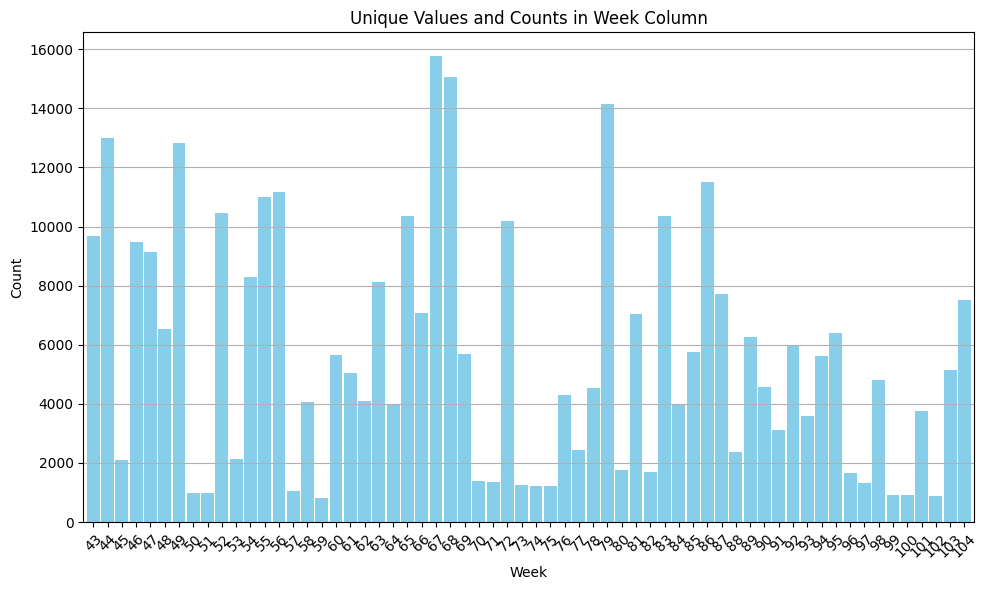

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace common empty representations with NaN
promotion_df.replace(['', ' '], pd.NA, inplace=True)

# Ensure the 'week' column exists
if 'week' in promotion_df.columns:
    # Get unique values and their counts, sorted by the index (week values)
    week_counts = promotion_df['week'].value_counts().sort_index()

    # Plotting the bar chart with increased space between bars
    plt.figure(figsize=(10, 6))
    week_counts.plot(kind='bar', color='skyblue', width=0.9)  # Adjust width to increase space
    plt.title('Unique Values and Counts in Week Column')
    plt.xlabel('Week')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The 'week' column does not exist in the DataFrame.")


In [80]:
import pandas as pd
import numpy as np

# Replace common empty representations with NaN
promotion_df.replace(['', ' '], pd.NA, inplace=True)

# Ensure the 'week' column exists
if 'week' in promotion_df.columns:
    # Get unique values in the 'week' column, sorted in ascending order
    unique_weeks = promotion_df['week'].dropna().unique()
    unique_weeks_sorted = np.sort(unique_weeks)  # Sort the unique values

    # Convert to a NumPy array
    week_array = np.array(unique_weeks_sorted)

    # Print the NumPy array of unique week values
    print("Unique Week Values in Promotions as a NumPy Array:")
    print(week_array)
else:
    print("The 'week' column does not exist in the DataFrame.")


Unique Week Values in Promotions as a NumPy Array:
[ 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104]


In [44]:
# Convert 'display' and 'feature' columns to lowercase and strip whitespace
promotion_df['display'] = promotion_df['display'].str.lower().str.strip()
promotion_df['feature'] = promotion_df['feature'].str.lower().str.strip()

# Display the first 5 rows after conversion
print("\nFirst 5 Rows of Promotions.csv After Conversion:")
print(tabulate(promotion_df.head(), headers="keys", tablefmt="fancy_grid"))



First 5 Rows of Promotions.csv After Conversion:
╒════╤════════════╤════════════════╤════════╤═══════════════════════╤═══════════════════╤════════════╕
│    │       code │   supermarkets │   week │ feature               │ display           │   province │
╞════╪════════════╪════════════════╪════════╪═══════════════════════╪═══════════════════╪════════════╡
│  0 │ 2700042240 │            285 │     91 │ not on feature        │ mid-aisle end cap │          2 │
├────┼────────────┼────────────────┼────────┼───────────────────────┼───────────────────┼────────────┤
│  1 │ 2700042292 │            285 │     92 │ interior page feature │ not on display    │          2 │
├────┼────────────┼────────────────┼────────┼───────────────────────┼───────────────────┼────────────┤
│  2 │ 2700042274 │            285 │     92 │ interior page feature │ not on display    │          2 │
├────┼────────────┼────────────────┼────────┼───────────────────────┼───────────────────┼────────────┤
│  3 │ 2700042273 │    

In [45]:
# Get unique categories in the 'feature' column
unique_features = promotion_df['feature'].unique()

# Get unique categories in the 'display' column
unique_displays = promotion_df['display'].unique()

# Create a DataFrame for unique features
unique_features_df = pd.DataFrame(unique_features, columns=['Unique Features'])

# Create a DataFrame for unique displays
unique_displays_df = pd.DataFrame(unique_displays, columns=['Unique Displays'])

# Print the unique categories tables
print("Unique Features Table:")
print(unique_features_df.to_string(index=False))  # Print without the index

print("\nUnique Displays Table:")
print(unique_displays_df.to_string(index=False))  # Print without the index


Unique Features Table:
        Unique Features
         not on feature
  interior page feature
  wrap interior feature
      wrap back feature
interior page line item
     wrap front feature
     front page feature
      back page feature

Unique Displays Table:
           Unique Displays
         mid-aisle end cap
            not on display
              rear end cap
                store rear
             front end cap
                  in-shelf
               store front
secondary location display
                  in-aisle
      promo/seasonal aisle
        side-aisle end cap


In [46]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode 'feature' column
promotion_df['feature_encoded'] = label_encoder.fit_transform(promotion_df['feature'])

# Encode 'display' column
promotion_df['display_encoded'] = label_encoder.fit_transform(promotion_df['display'])


In [47]:
promotion_df.head()

,code,supermarkets,week,feature,display,province,feature_encoded,display_encoded
0,2700042240,285,91,not on feature,mid-aisle end cap,2,4,3
1,2700042292,285,92,interior page feature,not on display,2,2,4
2,2700042274,285,92,interior page feature,not on display,2,2,4
3,2700042273,285,92,interior page feature,not on display,2,2,4
4,2700042254,285,92,interior page feature,not on display,2,2,4


# Pre processing Supermarket dataset

In [48]:
# Replace common empty representations with NaN
supermarket_df.replace(['', ' '], pd.NA, inplace=True)

# Step 1.3: Inspect the datasets
# Summary Information Table
total_count = supermarket_df.shape[0]
info_data = {
    "Column": supermarket_df.columns,
    "Non-Null Count": supermarket_df.notnull().sum(),
    "Total Count": total_count,
    "Missing Values": total_count - supermarket_df.notnull().sum(),
    "Data Type": supermarket_df.dtypes
}

# Ensure all columns have the same length
info_table = pd.DataFrame(info_data)

# Missing Values Table
missing_values_table = supermarket_df.isnull().sum().reset_index()
missing_values_table.columns = ["Column", "Missing Values"]

# Printing with tabulate
print("Supermarket.csv Info:")
print(tabulate(info_table, headers="keys", tablefmt="fancy_grid"))
print("\nFirst 5 Rows of Supermarket.csv:")
print(tabulate(supermarket_df.head(), headers="keys", tablefmt="fancy_grid"))
print("\nMissing Values in Supermarket.csv:")
print(tabulate(missing_values_table, headers="keys", tablefmt="fancy_grid"))


Supermarket.csv Info:
╒════════════════╤════════════════╤══════════════════╤═══════════════╤══════════════════╤═════════════╕
│                │ Column         │   Non-Null Count │   Total Count │   Missing Values │ Data Type   │
╞════════════════╪════════════════╪══════════════════╪═══════════════╪══════════════════╪═════════════╡
│ supermarket_No │ supermarket_No │              387 │           387 │                0 │ int64       │
├────────────────┼────────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ postal-code    │ postal-code    │              387 │           387 │                0 │ int64       │
╘════════════════╧════════════════╧══════════════════╧═══════════════╧══════════════════╧═════════════╛

First 5 Rows of Supermarket.csv:
╒════╤══════════════════╤═══════════════╕
│    │   supermarket_No │   postal-code │
╞════╪══════════════════╪═══════════════╡
│  0 │              199 │         30319 │
├────┼──────────────────┼───────────────┤
│  1 │

In [49]:
# 1. Check for duplicates
duplicates = supermarket_df.duplicated()
duplicate_count = duplicates.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [50]:
# Convert 'supermarket_No' to categorical
supermarket_df['supermarket_No'] = supermarket_df['supermarket_No'].astype('category')

# Check the data types to confirm the conversion
print("\nData Types After Conversion:")
print(supermarket_df.dtypes)


Data Types After Conversion:
supermarket_No    category
postal-code          int64
dtype: object


# Merge Dataset

**Merging data for the 1st problem statement - item.csv, sales.csv and supermarkets.csv**

In [51]:
merged_data_1 = pd.merge(sales_df, items_df, how='inner', on='code')

In [52]:
dataset_for_problem1 = pd.merge(merged_data_1, supermarket_df, how='inner', left_on='supermarket', right_on='supermarket_No')


In [53]:
# Assuming merged_data_1 is already created
# Check data types
data_types = dataset_for_problem1.dtypes
print("Data Types:\n", data_types)

# Check for null values
null_values = dataset_for_problem1.isnull().sum()
print("\nNull Values:\n", null_values)

# Check for duplicates
duplicates = dataset_for_problem1.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Data Types:
 code                       int64
amount                   float64
units                      int64
province                category
week                       int64
customerId                 int64
supermarket                int64
day                        int64
voucher                 category
standard_time           category
time_of_day             category
time_of_day_encoded        int64
total_sales              float64
type                      object
brand                     object
size                      object
size_in_grams            float64
type_encoded               int64
brand_category          category
size_in_grams_scaled     float64
supermarket_No          category
postal-code                int64
dtype: object

Null Values:
 code                    0
amount                  0
units                   0
province                0
week                    0
customerId              0
supermarket             0
day                     0
voucher                 

In [54]:
# Check for full rows (rows with no null values)
full_rows = dataset_for_problem1.dropna().shape[0]
print(f"Number of full rows (no null values): {full_rows}")

# Drop duplicates from the DataFrame
dataset_for_problem1 = dataset_for_problem1.drop_duplicates()

# Check the number of rows after dropping duplicates
num_rows_after_dropping_duplicates = dataset_for_problem1.shape[0]
print(f"Number of rows after dropping duplicates: {num_rows_after_dropping_duplicates}")


Number of full rows (no null values): 1033405
Number of rows after dropping duplicates: 1033368


In [55]:
# Drop multiple columns
dataset_for_problem1 = dataset_for_problem1.drop(['supermarket'], axis=1)

In [56]:
# Convert multiple columns to category
dataset_for_problem1[['type', 'brand']] = dataset_for_problem1[['type', 'brand']].astype('category')

In [57]:
dataset_for_problem1.head()

,code,amount,units,province,week,customerId,day,voucher,standard_time,time_of_day,...,total_sales,type,brand,size,size_in_grams,type_encoded,brand_category,size_in_grams_scaled,supermarket_No,postal-code
0,7680850106,0.80,1,2,1,125434,1,0,11:00,morning,...,0.80,type 2,barilla,16 OZ,453.592,1,barilla,-0.34476,244,40222
1,7680850106,1.60,2,2,1,503106,4,0,15:18,afternoon,...,3.20,type 2,barilla,16 OZ,453.592,1,barilla,-0.34476,244,40222
2,7680850106,1.19,1,2,4,18851,23,0,15:17,afternoon,...,1.19,type 2,barilla,16 OZ,453.592,1,barilla,-0.34476,244,40222
3,7680850106,1.19,1,2,6,26918,37,0,13:12,afternoon,...,1.19,type 2,barilla,16 OZ,453.592,1,barilla,-0.34476,244,40222
4,7680850106,0.79,1,2,7,8748,45,0,13:17,afternoon,...,0.79,type 2,barilla,16 OZ,453.592,1,barilla,-0.34476,244,40222


In [58]:
# Replace common empty representations with NaN
dataset_for_problem1.replace(['', ' '], pd.NA, inplace=True)

# Step 1.3: Inspect the datasets
# Summary Information Table
total_count = dataset_for_problem1.shape[0]
info_data = {
    "Column": dataset_for_problem1.columns,
    "Non-Null Count": dataset_for_problem1.notnull().sum(),
    "Total Count": total_count,
    "Missing Values": total_count - dataset_for_problem1.notnull().sum(),
    "Data Type": dataset_for_problem1.dtypes
}

# Ensure all columns have the same length
info_table = pd.DataFrame(info_data)


# Printing with tabulate
print("dataset_for_problem1 Info:")
print(tabulate(info_table, headers="keys", tablefmt="fancy_grid"))



dataset_for_problem1 Info:
╒══════════════════════╤══════════════════════╤══════════════════╤═══════════════╤══════════════════╤═════════════╕
│                      │ Column               │   Non-Null Count │   Total Count │   Missing Values │ Data Type   │
╞══════════════════════╪══════════════════════╪══════════════════╪═══════════════╪══════════════════╪═════════════╡
│ code                 │ code                 │          1033368 │       1033368 │                0 │ int64       │
├──────────────────────┼──────────────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ amount               │ amount               │          1033368 │       1033368 │                0 │ float64     │
├──────────────────────┼──────────────────────┼──────────────────┼───────────────┼──────────────────┼─────────────┤
│ units                │ units                │          1033368 │       1033368 │                0 │ int64       │
├──────────────────────┼─────────────────────

In [59]:
# Save DataFrame to CSV
dataset_for_problem1.to_csv('/kaggle/working/dataset_for_problem1.csv', index=False)  # Set index=False to avoid saving the index as a column

print("DataFrame saved to 'dataset_for_problem1'")


DataFrame saved to 'dataset_for_problem1'


**merging data for problem_statement_2 - items.csv, supermarkets.csv, promotions.csv**

In [60]:
# Merge Promotion and Items on 'code'
merged_df = pd.merge(promotion_df, items_df, how='left', left_on='code', right_on='code')

In [61]:
# Merge the resulting dataframe with Supermarkets on 'supermarkets'
final_merged_df = pd.merge(merged_df, supermarket_df, how='left', left_on='supermarkets', right_on='supermarket_No')

In [62]:
# Display the final merged dataframe
print(final_merged_df.head())

         code supermarkets  week                feature            display  \
0  2700042240          285    91         not on feature  mid-aisle end cap   
1  2700042292          285    92  interior page feature     not on display   
2  2700042274          285    92  interior page feature     not on display   
3  2700042273          285    92  interior page feature     not on display   
4  2700042254          285    92  interior page feature     not on display   

  province  feature_encoded  display_encoded    type   brand     size  \
0        2                4                3  type 3  hunt's  26.5 OZ   
1        2                2                4  type 3  hunt's  26.5 OZ   
2        2                2                4  type 3  hunt's    26 OZ   
3        2                2                4  type 3  hunt's    26 OZ   
4        2                2                4  type 3  hunt's  26.5 OZ   

   size_in_grams  type_encoded brand_category  size_in_grams_scaled  \
0      751.26175     

In [63]:
# Check for null values
null_values = final_merged_df.isnull().sum()
print("Null Values in Each Column:")
print(null_values[null_values > 0])  # Only display columns with null values

# Check for duplicates
duplicates_count = final_merged_df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates_count)


Null Values in Each Column:
type                    1196
brand                   1196
size                    1196
size_in_grams           1196
type_encoded            1196
brand_category          1196
size_in_grams_scaled    1196
dtype: int64

Number of Duplicate Rows: 0


In [64]:
# Drop rows with any null values
final_merged_df_cleaned = final_merged_df.dropna()

# Check the shape of the cleaned DataFrame
print("Shape of the original DataFrame:", final_merged_df.shape)
print("Shape of the cleaned DataFrame:", final_merged_df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame
print("\nSample Data from the Cleaned DataFrame:")
print(final_merged_df_cleaned.head())


Shape of the original DataFrame: (351372, 17)
Shape of the cleaned DataFrame: (350176, 17)

Sample Data from the Cleaned DataFrame:
         code supermarkets  week                feature            display  \
0  2700042240          285    91         not on feature  mid-aisle end cap   
1  2700042292          285    92  interior page feature     not on display   
2  2700042274          285    92  interior page feature     not on display   
3  2700042273          285    92  interior page feature     not on display   
4  2700042254          285    92  interior page feature     not on display   

  province  feature_encoded  display_encoded    type   brand     size  \
0        2                4                3  type 3  hunt's  26.5 OZ   
1        2                2                4  type 3  hunt's  26.5 OZ   
2        2                2                4  type 3  hunt's    26 OZ   
3        2                2                4  type 3  hunt's    26 OZ   
4        2                2       

In [65]:
# Print the data types of each column in the cleaned DataFrame
print("Data Types of Each Column in the Cleaned DataFrame:")
print(final_merged_df_cleaned.dtypes)


Data Types of Each Column in the Cleaned DataFrame:
code                       int64
supermarkets              object
week                       int64
feature                   object
display                   object
province                category
feature_encoded            int64
display_encoded            int64
type                      object
brand                     object
size                      object
size_in_grams            float64
type_encoded             float64
brand_category          category
size_in_grams_scaled     float64
supermarket_No          category
postal-code                int64
dtype: object


In [66]:
# Change data type of specified columns to category
columns_to_category = ['feature', 'display', 'type', 'brand']
final_merged_df_cleaned[columns_to_category] = final_merged_df_cleaned[columns_to_category].astype('category')
final_merged_df_cleaned['type_encoded'] = final_merged_df_cleaned['type_encoded'].astype('int64')

# Print the updated data types of each column to verify the changes
print("Updated Data Types of Each Column:")
print(final_merged_df_cleaned.dtypes)


Updated Data Types of Each Column:
code                       int64
supermarkets              object
week                       int64
feature                 category
display                 category
province                category
feature_encoded            int64
display_encoded            int64
type                    category
brand                   category
size                      object
size_in_grams            float64
type_encoded               int64
brand_category          category
size_in_grams_scaled     float64
supermarket_No          category
postal-code                int64
dtype: object


<ipython-input-66-da58cecb14b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df_cleaned[columns_to_category] = final_merged_df_cleaned[columns_to_category].astype('category')
<ipython-input-66-da58cecb14b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df_cleaned['type_encoded'] = final_merged_df_cleaned['type_encoded'].astype('int64')


In [67]:
# Drop the 'supermarkets' column from the DataFrame
dataset_for_problem2= final_merged_df_cleaned.drop(columns=['supermarkets'])

# Verify that the column has been dropped
print("Columns after dropping 'supermarkets':")
print(final_merged_df_cleaned.columns)


Columns after dropping 'supermarkets':
Index(['code', 'supermarkets', 'week', 'feature', 'display', 'province',
       'feature_encoded', 'display_encoded', 'type', 'brand', 'size',
       'size_in_grams', 'type_encoded', 'brand_category',
       'size_in_grams_scaled', 'supermarket_No', 'postal-code'],
      dtype='object')


In [68]:
# Save DataFrame to CSV
dataset_for_problem2.to_csv('/kaggle/working/dataset_for_problem2.csv', index=False)  # Set index=False to avoid saving the index as a column

print("DataFrame saved to 'dataset_for_problem2'")

DataFrame saved to 'dataset_for_problem2'
